In [1]:
import numpy as np 
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes = True)
sns.set(font_scale=1.5) # fixe la taille de la police à 1.5 * 12pt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Chapitre 2 : Représentation des données

**La représentation des données : la clé de la communication**

Les données sont partout autour de nous, nous en générons nous-même, consciemment ou inconsciemment, tous les jours à travers nos activités professionnelles (production, commerce, échanges, transactions financières, etc) et personnelles (réseaux sociaux, transport, loisirs, etc). Depuis 2011 l'état français met à disposition des données d'origine publique (provenant des collectivités territoriales, de l'état, etc) ou d'origine privée (entreprises, associations, etc) sur sa plateforme https://www.data.gouv.fr/fr/ et grâce à la plateforme [DataFrance](https://datafrance.info/?utm_source=datagouv&utm_medium=datagouv&utm_campaign=reuse-global) il est possible de visualiser différentes représentations des données.

Généralement il est possible d'utiliser différentes représentations pour un même jeu de données, l'objectif est de trouver la meilleure représentation possible pour illustrer l'information que l'on souhaite communiquer. 

**Chargement du jeu de données IMdB** 

In [2]:
DATA = pd.read_csv('../DATA/movie_metadata3.csv', delimiter=';', index_col='movie_title')

# 1. Format des données

#### Du point de vue mathématiques 

Prenons un exemple simple de population à $N=10$ individus et deux variables dans la base de données IMdB : le score et le nom du réalisateur. 

In [3]:
df = pd.DataFrame(DATA, columns=['imdb_score', 'director_name'])
df.head(n = 10)

,imdb_score,director_name
movie_title,,
The Shawshank Redemption,9.3,Frank Darabont
The Dark Knight,9.0,Christopher Nolan
Inception,8.8,Christopher Nolan
Fight Club,8.8,David Fincher
Pulp Fiction,8.9,Quentin Tarantino
Forrest Gump,8.8,Robert Zemeckis
The Lord of the Rings: The Fellowship of the Ring,8.8,Peter Jackson
The Matrix,8.7,Lana Wachowski
The Lord of the Rings: The Return of the King,8.9,Peter Jackson


Les variables peuvent être modélisées du point de vue du statisticien comme des variables aléatoires dont les réalisations sont des valeurs numériques pour les variables quantitatives (le score) ou des modalités pour les variables qualitatives (le nom du réalisateur). 



Toutes les données ne sont pas forcément faciles à représenter sous la forme d'objets mathématiques, notamment les variables qualitatives sur lesquelles il n'est pas possible de faire des calculs. En revanche pour les variables quantitatives, les valeurs prises par chaque individu peuvent être stockées sous la forme d'un vecteur $\mathbf{x}= [x_1, x_2, \dots, x_N]$ où $x_i$ correspond à la réalisation de la variable aléatoire $X$ pour le $i^{ème}$ individu.



#### Du point de vue informatique

Différents formats de stockage : 
* propres à la discipline (ex. données astronomique en format FITS, données IRM en format Nifti, etc)
* sous forme de tableau csv, excel, de base de données SQL, etc

C'est au traiteur de données de les mettre ensuite dans un format exploitable avec le langage de programmation et les outils de science des données choisis. 

Dans le cadre de ce cours, nous ne travaillerons qu'avec des données sous forme de tableaux (fichier .csv). Nous utiliserons la librairie Pandas de Python afin de travailler avec ces tableaux de données, qui seront stockés dans un objet de type DataFrame. 
Une colonne du DataFrame correspond à une variable, exceptée la première colonne. Une ligne du tableau correspond à un individu (ici un film) on retrouve dans la première colonne l'identifiant de l'individu (le nom du film). 

# 2. Représentation numérique des données

**Intérêt de la représentation numérique des données :**
* Synthétiser l'information 
* Réduire la dimension 
* Donner le comportement moyen des données

## 2.1. Moyenne empirique

Soit une variable aléatoire X caractérisant les individus d’un échantillon de taille N,
on notera $\mathbf{x}= [x_1, x_2, \dots, x_N]$ les valeurs prises par X pour l’ensemble des N individus.

Si les $N$ observations $\{x_1,  x_2, \dots, x_N\}$ d'une variable aléatoire $X$ ne sont pas réparties en classes (observations brutes), on définit la moyenne empirique de $X$ par : 
\begin{equation}
\bar{x} = \frac{1}{N}\sum_{i = 1}^{N} x_i
\end{equation}

Si les $N$ observations d'une variable aléatoire $X$ ont été réparties en $k$ classes ($k < N$), on calcule alors la moyenne des valeurs $\{x_1,  x_2, \dots, x_k\}$ prises par $X$ pondérées par la fréquence de chaque valeur $x_i$ : 
\begin{equation}
\bar{x} = \sum_{i = 1}^{k} f_i x_i = \frac{1}{N}\sum_{i = 1}^{k} n_i x_i
\end{equation}

**Propriétés**
* La moyenne résume par un seul nombre l'ensemble des observations, elle donne une information sur la tendance centrale des données. 
* La moyenne empirique est sensible aux valeurs extrêmes ou aberrantes.
* La moyenne empirique est un estimateur de la véritable valeur de la moyenne, si on utilise un nouvel ensemble de $N$ observations $\{x_1,  x_2, \dots, x_N\}$ issues de la même variable $X$, on ne trouvera pas exactement la même valeur $\bar{x}$, de même si on change le nombre $N$ d'observations utilisées pour calculer $\bar{x}$.

On sélectionne dans la base de données "imdb$\_$5000-movie-dataset" la variable 'score'. Les valeurs de scores prises par les $N$ = 4125 films sont reportées sur la figure ci-dessous ainsi que la valeur moyenne de la variable score.

In [4]:
print('Moyenne de la variable score : ' + str(df['imdb_score'].mean()))

Moyenne de la variable score : 6.423733333333334


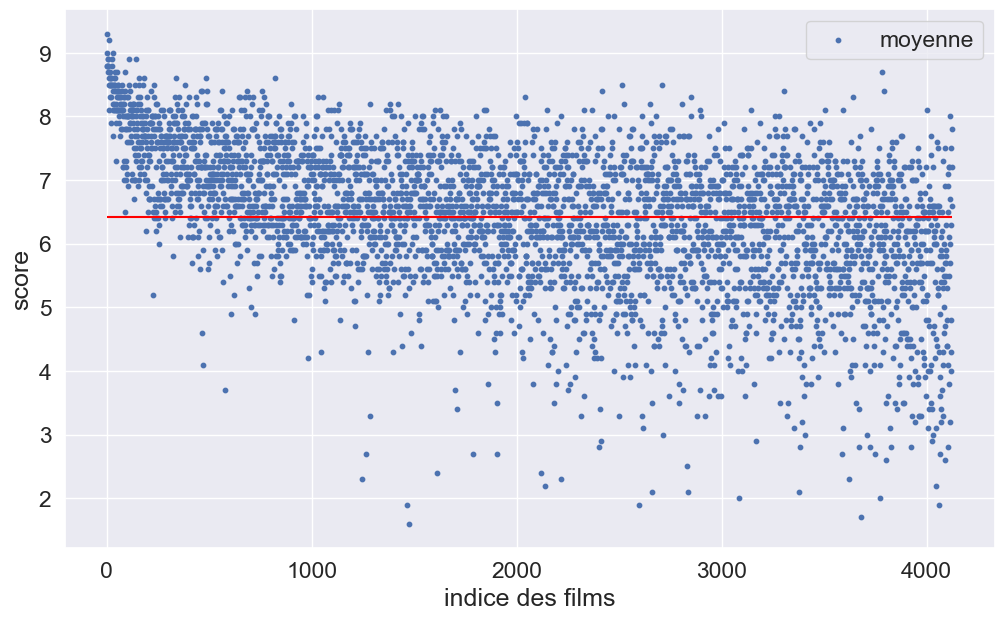

In [5]:
score =  df['imdb_score'].to_numpy() # transformation de la colonne score en tableau numpy

plt.figure(figsize = (12, 7))
plt.scatter(np.arange(len(score)),score, s = 10)
plt.hlines(df['imdb_score'].mean(),0, len(score) , 'red')
plt.xlabel('indice des films')
plt.ylabel('score')
plt.legend(['moyenne'])
plt.show()

**Observations :** La moyenne seule ne suffit pas à résumer les données, sur l'exemple précédent, en connaissant seulement la valeur moyenne, on n'a pas accès à la dispersion des données autour de cette valeur moyenne. On pourrait créer un jeu de données qui a exactement la même moyenne, avec le même nombre de points et pourtant très différent des données de la variable score. 

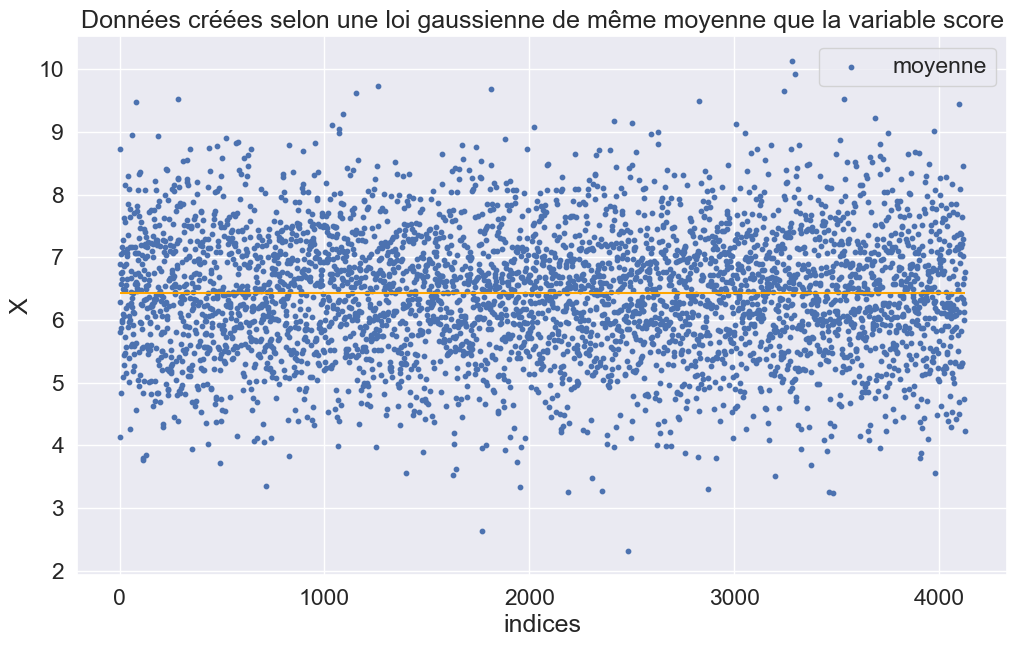

6.41072901681785


In [6]:
m = df['imdb_score'].mean() #moyenne de la variable score
N = len(df['imdb_score']) #nombre de valeurs

X = np.random.randn(N)+m
plt.figure(figsize = (12, 7))
plt.scatter(np.arange(N),X, s = 10)
plt.hlines(df['imdb_score'].mean(),0, len(score) , 'orange')
plt.xlabel('indices')
plt.ylabel('X')
plt.legend(['moyenne'])
plt.title('Données créées selon une loi gaussienne de même moyenne que la variable score')
plt.show()
print(np.mean(X))

## 2.2. Médiane 

La médiane est la valeur centrale de la série $\{x_1,  x_2, \dots, x_N\}$ triée par ordre croissant (ou décroissant), la médiane sépare la série en deux parties comprenant exactement le même nombre de données de part et d'autre de la médiane.

**Propriétés :**
* La médiane est moins sensible que la moyenne à la présence de valeurs aberrantes.
* La médiane se prête mal aux combinaisons algébriques car elle n'est pas obtenue par une opération linéaire sur les données. Elle ne dépend pas des valeurs des données, seulement de leur nombre. 
* Si $N$ est impair, la médiane est la $(N+1)/2^{\mbox{ème}}$ valeur du jeu de données triées.
* Si $N$ est pair, la médiane est la moyenne de la $N/2^{\mbox{ème}}$ valeur et de la `$(N/2 +1)^{\mbox{ème}}$ valeur.

In [7]:
print('Médiane de la variable score : ' + str(df['imdb_score'].median()))

Médiane de la variable score : 6.5


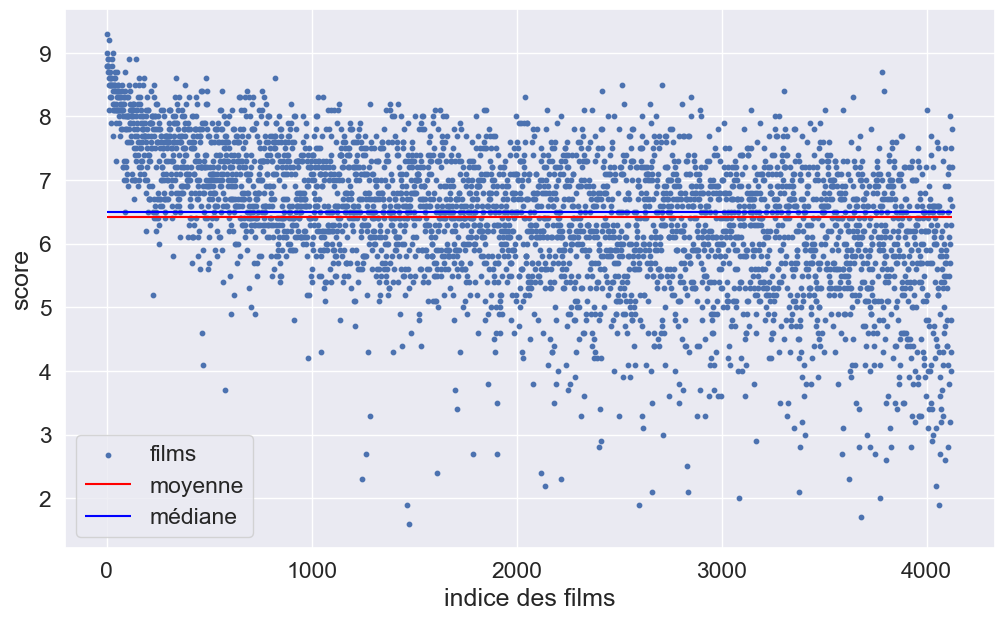

In [8]:
score =  df['imdb_score'].to_numpy() # transformation de la colonne score en tableau numpy

plt.figure(figsize = (12, 7))
plt.scatter(np.arange(len(score)),score, s = 10)
plt.hlines(df['imdb_score'].mean(),0, len(score) , 'red')
plt.hlines(df['imdb_score'].median(),0, len(score) , 'blue')
plt.xlabel('indice des films')
plt.ylabel('score')
plt.legend(['films', 'moyenne', 'médiane'])
plt.show()

**Observations :**
La médiane est ici très proche de la valeur moyenne, mais ce n'est pas toujours le cas. A noter que la médiane est égale à la moyenne lorsque la distribution des données est symétrique autour de la moyenne (par exemple lorsque les données suivent une loi gaussienne). 

## 2.3. Variance et écart-type

La variance $\sigma^2$ d'un échantillon est la moyenne de la somme des carrés des écarts par rapport à la moyenne. La variance est aussi appelée écart quadratique moyen (EQM) ou variance empirique. L'écart-type $\sigma$ est la racine carrée de la variance.
Si les $N$ observations $\{x_1,  x_2, \dots, x_N\}$ d'une variable aléatoire $X$ ne sont pas réparties en classes (observations brutes), on définit la variance de $X$ par :

\begin{equation}
Var(X) = \sigma_X^2 = \frac{1}{N} \sum_{i = 1}^{N}\left( x_i - \bar{x}\right)^2
\end{equation}


Si les $N$ observations d'une variable aléatoire $X$ ont été réparties en $k$ classes ($k < N$), on calcule alors la variance des valeurs $\{x_1,  x_2, \dots, x_k\}$ prises par $X$ pondérées par la fréquence de chaque valeur $x_i$ : 
\begin{equation}
Var(X) = \sigma_X^2 = \sum_{i = 1}^{k}f_i\left( x_i - \bar{x}\right)^2 = \frac{1}{N}\sum_{i = 1}^{k}n_i\left( x_i - \bar{x}\right)^2
\end{equation}

**Propriétés :**
* L'écart-type $\sigma_X$ caractérise la dispersion des observations par rapport à leur moyenne. Plus $\sigma_X$ est faible, plus les données sont regroupées autour de la moyenne $\bar{x}$ (population homogène). Plus $\sigma_X$ est élevée, plus les données sont dispersées (population hétérogène).
* L'expression de la variance empirique $Var(X)$ donnée ci-dessus est un estimateur possible de la variance de $X$ obtenu grâce aux $N$ observations $\{x_1,  x_2, \dots, x_N\}$. On utilise parfois une autre expression pour la variance empirique : 
	\begin{equation}
	Var(X) = \sigma_X^2 = \frac{1}{N-1} \sum_{i = 1}^{N}\left( x_i - \bar{x}\right)^2
	\end{equation}
	où la constante $\frac{1}{N}$ est remplacée par $\frac{1}{N-1}$ afin de rendre cet estimateur non biaisé.

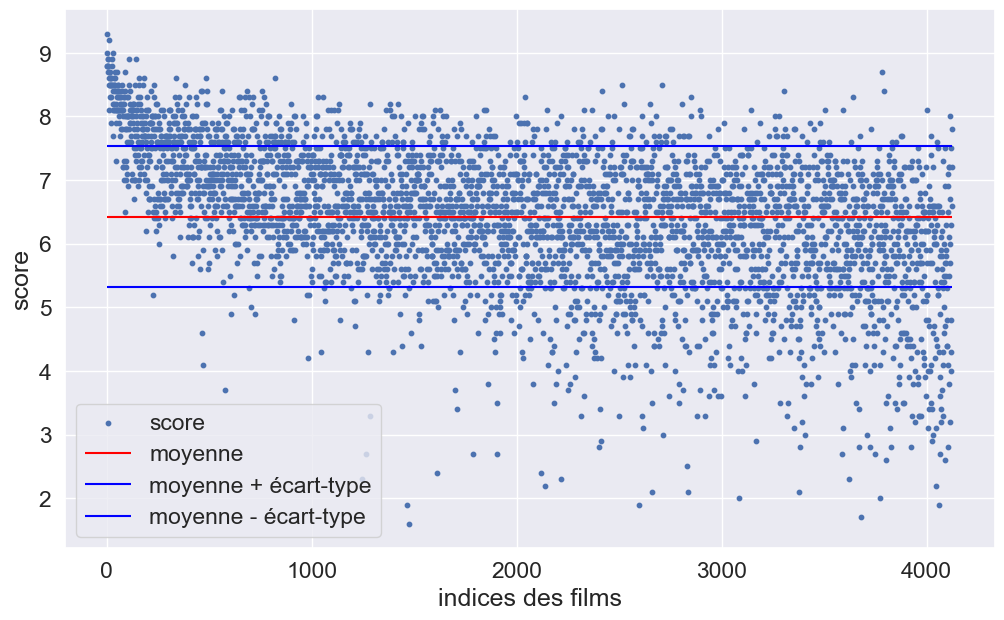

In [9]:
score =  df['imdb_score'].to_numpy() # transformation de la colonne score en tableau numpy
moy = df['imdb_score'].mean() # mean est pour moyenne
std = df['imdb_score'].std() # std est pour standard deviation
plt.figure(figsize = (12, 7))
plt.scatter(np.arange(len(score)),score, s = 10)
plt.hlines(moy, 0, len(score), 'red')
plt.hlines(moy+std, 0, len(score), 'blue')
plt.hlines(moy-std, 0, len(score), 'blue')
plt.xlabel('indices des films')
plt.ylabel('score')
plt.legend(['score','moyenne', 'moyenne + écart-type', 'moyenne - écart-type'])
plt.show()

In [10]:
std

1.1073082446447604

**Observations :**
* La donnée de l'écart-type nous apporte de l'information supplémentaire sur la répartition des données autour de la moyenne. 
* En moyenne, l'écart par rapport à la moyenne est de 1.1 dans le cas de la variable score. 
* Sur le graphique, on voit que la majorité des données est concentrée dans l'intervalle $[m-\sigma, m+\sigma]$ mais on ne sait pas quelle proportion se situe dans cet intervalle. Cela va dépendre des valeurs extrêmes, les valeurs les plus éloignées de la moyenne vont faire croître la valeur de l'écart-type.

## 2.4. Quantile (ou quartile) 

Les quartiles sont les 3 valeurs qui divisent le jeu de données trié dans l'ordre croissant en quatre parts égales. On les note souvent $Q_1$, $Q_2$ et $Q_3$ avec la convention suivante, si N est le nombre de données : 
* $Q_1$ est la $\frac{N}{4}^{\mbox{ème}}$ valeur,  avec un arrondi à l'entier supérieur.
* $Q_2$ est la médiane.
* $Q_3$ est la $\frac{3N}{4}^{\mbox{ème}}$ valeur, avec un arrondi à l'entier supérieur.


Q1 = 5.8
Q2 = 6.5
Q3 = 7.2


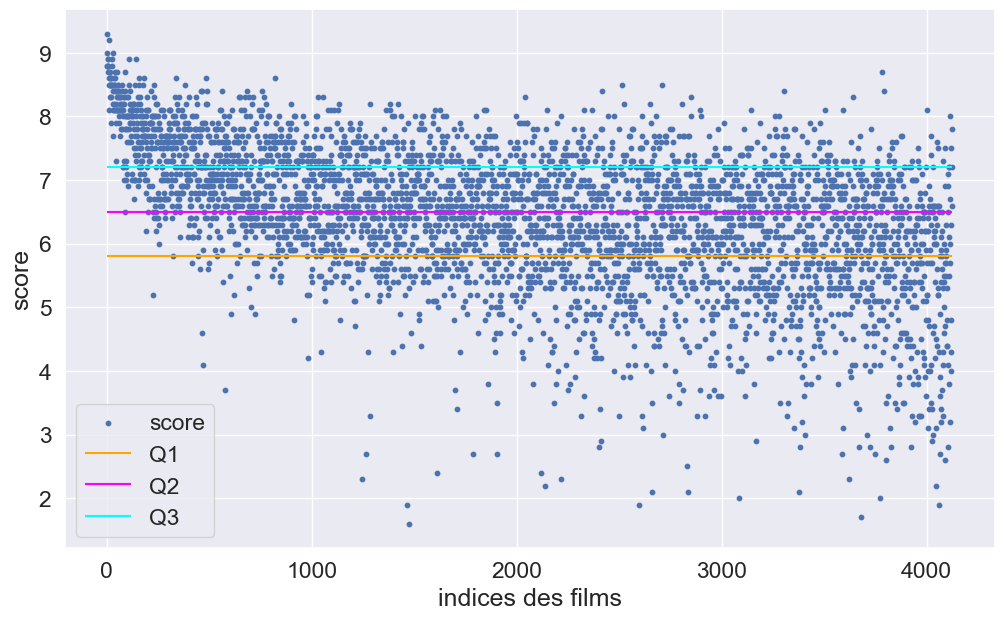

In [11]:
score =  df['imdb_score'].to_numpy() # transformation de la colonne score en tableau numpy

Q1 = np.percentile(score, 25) # 25% des valeurs sont inférieures à Q1
Q2 = np.percentile(score, 50) # 50% des valeurs sont inférieures à Q2
Q3 = np.percentile(score, 75) # 75% des valeurs sont inférieures à Q3
print('Q1 = ' +str(Q1))
print('Q2 = ' +str(Q2))
print('Q3 = ' +str(Q3))

plt.figure(figsize = (12, 7))
plt.scatter(np.arange(len(score)),score, s = 10)
plt.hlines(Q1,0, len(score) , 'orange')
plt.hlines(Q2,0, len(score) , 'magenta')
plt.hlines(Q3,0, len(score) , 'cyan')
plt.xlabel('indices des films')
plt.ylabel('score')
plt.legend(['score', 'Q1', 'Q2', 'Q3'])
plt.show()

**Observations :**
* On remarque que ($Q_3$ - $Q_2$) = ($Q_2$ - $Q_1$) = 0.7, ce qui veut dire que les données sont distribuées de manière assez homogène autour de la médiane. 
* En revanche, on remarque que les données situées dans le premier quantile, entre la valeur minimale et $Q_1$ sont bien plus dispersées que dans le dernier quantile entre $Q_3$ et la valeur maximale.  


## 2.5. Fonction de répartition et densité de probabilité

**Fonction de répartition**

La fonction de répartition $F$ d'une variable aléatoire $X$ se définit de la façon suivante : 
\begin{equation}
F(x) = Pr(X < x) , ~~~~ \forall x \in \mathbb{R}
\end{equation}

La fonction de répartition possède les propriétés suivantes : 
* la fonction $F$ est une fonction croissante,
* la fonction $F$ prend ses valeurs dans $[0,1]$,
* on en déduit 
	\begin{equation}
	\underset{x \rightarrow -\infty}{\lim} F(x) = 0 \mbox{   et } \underset{x \rightarrow +\infty}{\lim} F(x) = 1
	\end{equation}
* la connaissance de la fonction de répartition $F$ d'une variable aléatoire $X$ permet de connaitre la probabilité de la variable $X$ d'appartenir à tout intervalle $[a,b]$ : 
	\begin{equation}
	Pr(a \leqslant X \leqslant b) = F(b) - F(a). %% Cette propriété doit leur rappeler la propriété de la primitive et de l'intégration d'une fonction sur un intervalle 
	\end{equation}

**Densité de probabilité** 

La densité de probabilité $f$ d'une variable aléatoire continue $X$ est définie de la façon suivante : 
* $f$ est continue et positive sur $\mathbb{R}$,
* $\int_\mathbb{R} f(x) dx = 1$, 
* on dit que $X$ suit une loi de densité $f$ si $\forall a < b \in \mathbb{R}$, $Pr(a \leqslant X \leqslant b) =\int_a^b f(x) dx$.
	

    
**Loi de probabilité discrète** 

On ne parlera pas de densité de probabilité pour une variable discrète mais plutôt de loi de probabilité. Une variable aléatoire discrète $X$ prend ses valeurs dans un ensemble dénombrable de points. La loi de probabilité d'une variable aléatoire discrète est donc une loi discrète. Elle définit la probabilité de la variable $X$ de prendre la valeur $x_i$, on la note : 
\begin{equation}
Pr(X = x_i) = p_i \mbox{  avec  } 0 \leqslant p_i \leqslant 1 \mbox{  et  }  {\sum}_{i} p_i = 1.
\end{equation}



**Fonction de répartition discrète**

On peut définir une fonction de répartition discrète telle que 
\begin{equation}
F(x_j) = Pr(X \leqslant x_j) = \sum_{i = 1}^{j} Pr(X = x_i) = \sum_{i = 1}^{j} p_i
\end{equation}


**Remarques :**
* Lorsque la densité de probabilité d'une variable aléatoire est connue, alors cette variable est parfaitement caractérisée, les paramètres précédents (moyenne, médiane, variance, quantiles) se déduisent de l'expression de la densité de probabilité.
* Lorsque l'on travaille sur la densité de probabilité, on perd le lien individu-valeur de la variable aléatoire.

## 2.6. Une fonction bien pratique

L'objet DataFrame de Pandas possède une fonction permettant de résumer numériquement les variables quantitatives d'un jeu de données : 
* Nombre de valeurs 
* Moyenne
* Ecart-type
* Valeur min
* Q1
* Q2
* Q3 
* Valeur max

Cela permer de visualiser en un seul coup d'oeil les évenutelles données aberrantes (des valeurs minimales ou maximales non cohérentes, des données manquantes si toutes les variables ne contiennent pas le même nombre de valeurs, etc)

In [12]:
DATA.describe()

,num_critic_for_reviews,duration,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score
count,4125.000000,4125.000000,4.125000e+03,4125.000000,4125.000000,4.125000e+03,4125.000000,4125.000000
mean,152.180364,109.268364,9.530653e+04,1.370424,303.641697,3.460696e+07,2002.045576,6.423733
std,122.036266,22.325864,1.470521e+05,2.029486,393.195911,4.098044e+07,12.065910,1.107308
min,1.000000,20.000000,6.000000e+00,0.000000,1.000000,1.100000e+03,1916.000000,1.600000
25%,63.000000,95.000000,1.356200e+04,0.000000,89.000000,8.000000e+06,1998.000000,5.800000
50%,123.000000,105.000000,4.387900e+04,1.000000,183.000000,2.000000e+07,2005.000000,6.500000
75%,208.000000,119.000000,1.121380e+05,2.000000,364.000000,4.500000e+07,2010.000000,7.200000
max,813.000000,330.000000,1.689764e+06,43.000000,5060.000000,3.000000e+08,2016.000000,9.300000


Quand on regarde la ligne max de la colonne duration on se rend compte qu'il y a un film qui dure 330min, soit 5h30. C'est un peu long pour un film, donc on peut vérifier si c'est bien un film ou une erreur de saisie. On peut aussi vérifier si ce film est le seul à durer plus de 5h.


In [13]:
DATA[DATA.duration == 330]

,director_name,num_critic_for_reviews,duration,actor_1_name,actor_2_name,num_voted_users,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,genres,plot_keywords
movie_title,,,,,,,,,,,,,,,,
Blood In Blood Out,Taylor Hackford,12,330,Delroy Lindo,Jesse Borrego,23181,2,129,English,USA,R,35000000,1993,8.0,Crime|Drama,1970s|1980s|barrio|gang war|mexican


En regardant sur internet, on se rend compte que c'est **une erreur de saisie**. On peut donc supprimer cette ligne du jeu de données.


# 3. Représentation graphique des données

Les outils de représentations graphiques utilisés dans cette partie du cours proviennent majoritairement du package [matplotlib](https://matplotlib.org/gallery/index.html) et [seaborn](https://seaborn.pydata.org/examples/index.html)

## 3.1. Nuage de points

La façon la plus simple de représenter graphiquement les données est la représentation par nuage de points. Elle permet de visualiser rapidement la distribution des données. 

<span style="color: #27AE60"> **Exemple :** </span> Représentation unidimensionnelle (une seule variable) à l'aide d'un nuage de points

Q1 = 5.8
Q2 = 6.5
Q3 = 7.2


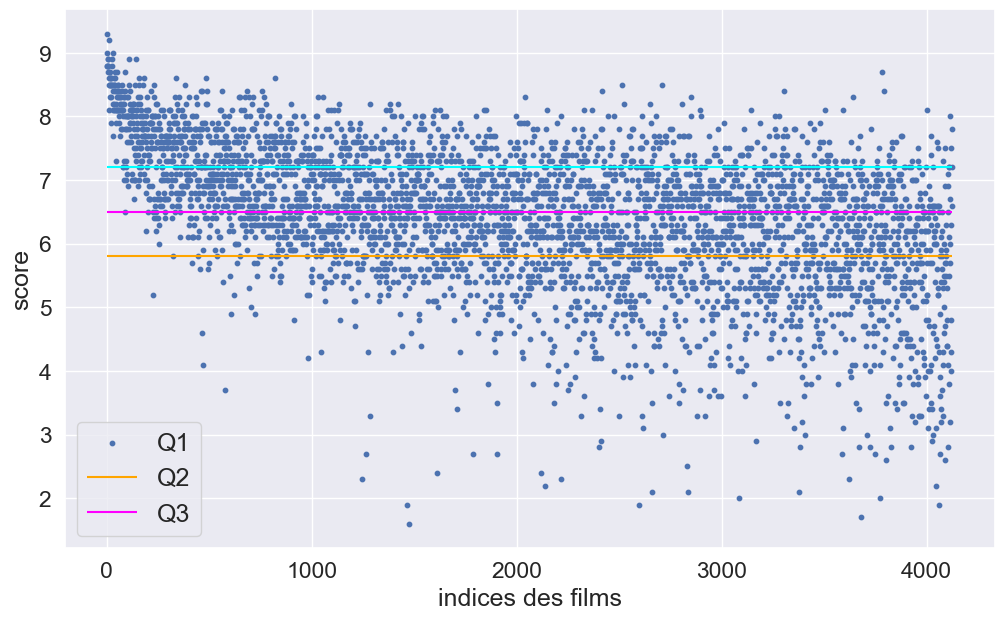

In [14]:
score =  df['imdb_score'].to_numpy() # transformation de la colonne score en tableau numpy
Q1 = np.percentile(score, 25)
Q2 = np.percentile(score, 50)
Q3 = np.percentile(score, 75)
print('Q1 = ' +str(Q1))
print('Q2 = ' +str(Q2))
print('Q3 = ' +str(Q3))

plt.figure(figsize = (12, 7))
plt.scatter(np.arange(len(score)),score, s = 10)
plt.hlines(Q1,0, len(score) , 'orange')
plt.hlines(Q2,0, len(score) , 'magenta')
plt.hlines(Q3,0, len(score) , 'cyan')
plt.xlabel('indices des films')
plt.ylabel('score')
plt.legend(['Q1', 'Q2', 'Q3'],fontsize=18)
plt.show()

<span style="color: #27AE60"> **Exemple :** </span> représentation multidimensionnelle (plusieurs variables) à l'aide d'un nuage de points

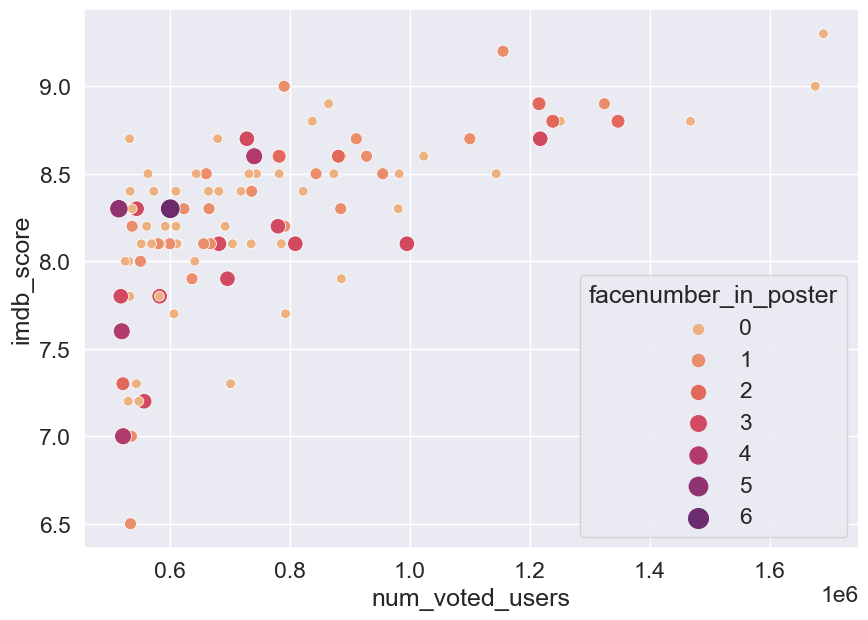

In [15]:
plt.figure(figsize = (10,7))
sns.scatterplot(x="num_voted_users", y="imdb_score",hue="facenumber_in_poster", size="facenumber_in_poster",
                sizes=(50, 200), palette = 'flare', hue_norm=(0, 7),legend="full", data=DATA.head(n = 100))
plt.show()

En remplaçant `size="facenumber_in_poster"` par `size="language"` on se rend compte que la légende se sépare en deux classification. On remarque qu'il n'y a quasiement que des cercle de même taille: la manière de représenter les données **n'est pas pertinente**.

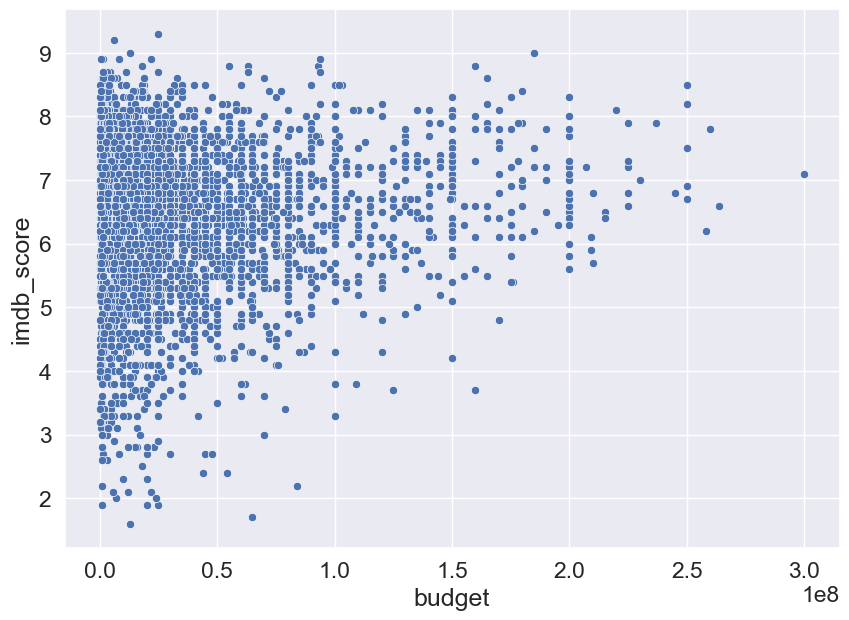

In [16]:
plt.figure(figsize = (10,7))
sns.scatterplot(x="budget", y="imdb_score", data=DATA)
plt.show()

## 3.2. Histogramme

L'histogramme est un outil statistique de représentation graphique de l'information de fréquence (ou d'effectif) des valeurs prises par une variable $X$. Il donne une image de l'allure globale de la distribution des valeurs $\{x_1,  x_2, \dots\}$ dans le jeu de données étudié. Il apporte de l'information sur la dispersion, sur les valeurs extrêmes et sur la présence de valeurs aberrantes.


**Construction d'un histogramme** 

* Choisir le nombre de classes, ou la largeur des classes
    * pour une variable quantitative discrète : 
    * pour une variable quantitative continue :   
    * pour une variable qualitative (nominale ou ordinale) : 
    * [règle de Freedman-Diaconis pour la largeur des classes](https://en.wikipedia.org/wiki/Freedman–Diaconis_rule)
* Calculer les fréquences pour les différentes classes de valeurs/modalités de la variable considérée.
* Construire l'histogramme.

En pratique, l'histogramme peut être calculé avec Numpy : 

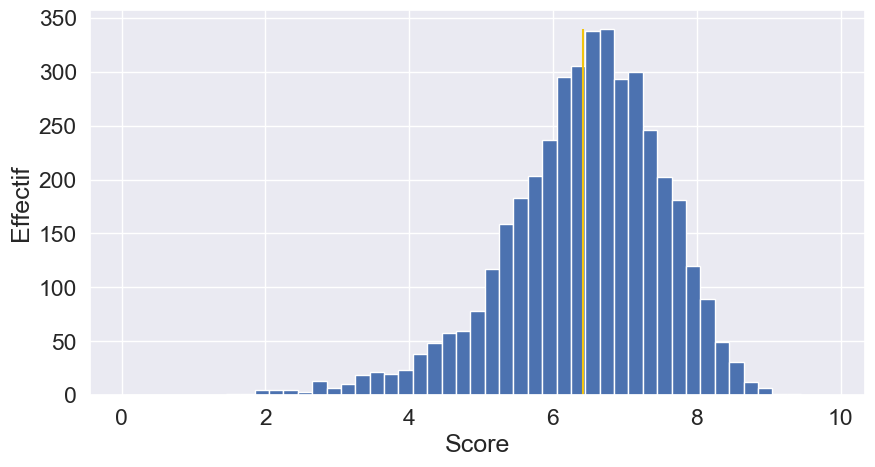

In [17]:
N = 38 # Nombre de classes

FDbinwidth = 2*(Q3- Q1)*len(score)**(-1/3) # Largeur de la classe avec la règle de Freedman-Diaconis
N_FD = int((np.max(score) - np.min(score))/FDbinwidth) # Nombre de bins correspondant 

 
score =  df['imdb_score'].to_numpy() # transformation de la colonne score en tableau numpy
moy = df['imdb_score'].mean()

bins1 = np.arange(0.05,10.05, 0.2)
hist, bins = np.histogram(score, bins = bins1) # changer par N, N_FD, bins1

centers = (bins[1:]+bins[:-1])/2

plt.figure(figsize = (10,5))
plt.bar(centers, hist, width = (bins[1]-bins[0]))
plt.vlines(moy, 0, np.max(hist), color= '#F1C40F') # Superposition de la moyenne
plt.xlabel('Score')
plt.ylabel('Effectif')
plt.show()

In [18]:
bins

array([0.05, 0.25, 0.45, 0.65, 0.85, 1.05, 1.25, 1.45, 1.65, 1.85, 2.05,
       2.25, 2.45, 2.65, 2.85, 3.05, 3.25, 3.45, 3.65, 3.85, 4.05, 4.25,
       4.45, 4.65, 4.85, 5.05, 5.25, 5.45, 5.65, 5.85, 6.05, 6.25, 6.45,
       6.65, 6.85, 7.05, 7.25, 7.45, 7.65, 7.85, 8.05, 8.25, 8.45, 8.65,
       8.85, 9.05, 9.25, 9.45, 9.65, 9.85])

ou avec le package python [seaborn](https://seaborn.pydata.org) : 

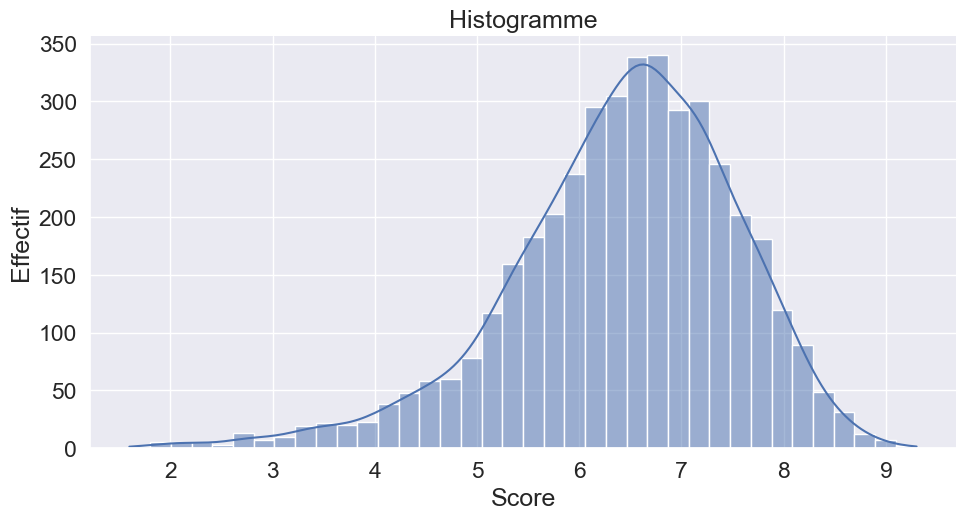

In [19]:
sns.displot(score, bins=38, kde= 1, height=5, aspect=2) # kde lisse l'histogramme et display le lissage.
plt.title('Histogramme')
plt.xlabel('Score')
plt.ylabel('Effectif')
plt.show()

**Avantages de l'histogramme :**

* l'histogramme permet de visualiser la distribution des observations,
* représentation discrète de la distribution des observations,
* parfaitement adapté aux variables quantitatives discrètes et aux variables qualitatives,



Dans le cas de variables quantitatives continues, il peut être nécessaire d'avoir une représentation continue similaire à l'histogramme : c'est la densité de probabilité. Dans ce cas plusieurs solutions possibles : 
* la loi des données suit un modèle paramétrique$^1$ de la distribution (par exemple loi gaussienne) $\rightarrow$ estimation des paramètres
* si pas de modèle paramétrique : méthode à noyaux (méthode de Parzen-Rosenblatt) pour lisser l'histogramme : 
\begin{equation}
\hat{f}_h(x) = \frac{1}{Nh}  \sum_{i = 1}^{N} K\left(\frac{x - x_i}{h}\right)
\end{equation}
où $K$ est le noyaux de lissage, généralement 
\begin{equation} K(x) = \frac{1}{\sqrt{2\pi}}e^{-0.5x^2},
\end{equation} 
et $h$ est un paramètre de lissage (déterminé automatiquement dans la fonction python utilisée). 

----

$^1$ Vous trouverez une liste de lois de probabilité avec leur représentation graphique à cette adresse https://fr.wikipedia.org/wiki/Liste_de_lois_de_probabilité. La plupart du temps les lois gaussiennes, gamma, et student sont suffisantes. Pour appeler ces lois en Python vous pouvez consulter le package `stat` de Scipy : https://docs.scipy.org/doc/scipy/reference/stats.html.

<span style="color: #27AE60"> **Exemple :** </span> variable gaussienne $X\sim \mathcal{N}(m, \sigma )$ avec $m = 5$ et $\sigma = 1.2$.

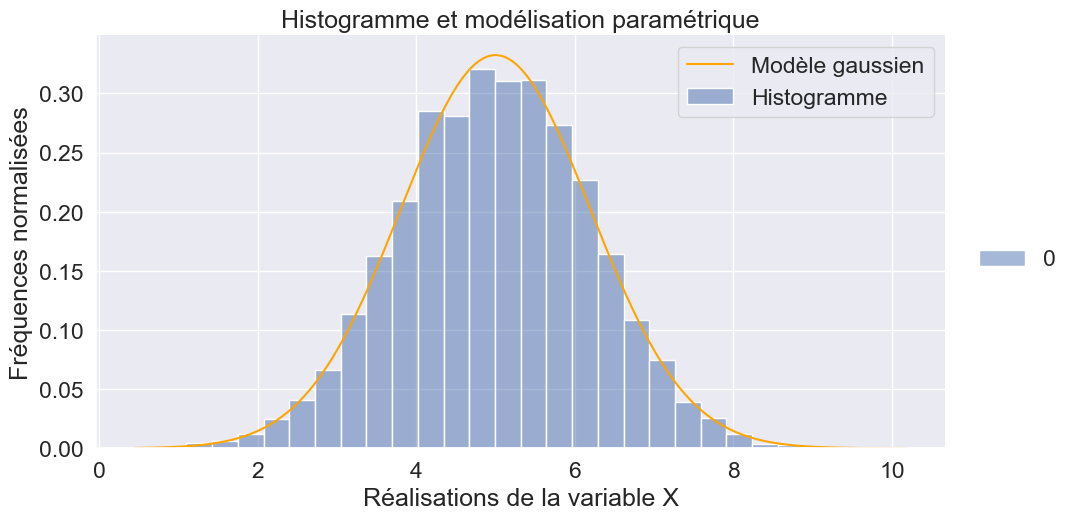

Moyenne du modèle gaussien : 5.0000086008016495 et écart-type : 1.1986775841787654


In [20]:
# Synthèse de N observations d'une variable gaussienne 

N = 10000
m = 5
sigma = 1.2
X = np.random.normal(m, sigma, (1,N))
pdf = stats.norm.pdf(np.linspace(np.min(X), np.max(X), 500), m, sigma)

sns.displot(X.T, bins=30, stat = 'density', kde= False, height=5, aspect=2);
plt.plot(np.linspace(np.min(X), np.max(X), 500), pdf, 'orange')
plt.title('Histogramme et modélisation paramétrique')
plt.xlabel('Réalisations de la variable X')
plt.ylabel('Fréquences normalisées')
plt.legend(['Modèle gaussien', 'Histogramme'])
plt.show()

# Pour obtenir la moyenne et la variance estimée avec le modèle gaussien : 
m,sig = stats.norm.fit(X)
print('Moyenne du modèle gaussien : '+str(m)+' et écart-type : '+str(sig))



<span style="color: #27AE60"> **Exemple :** </span>
Sur la variable budget avec une estimation paramétrique (loi gamma). 

(0.7708321194692078, 1099.9999999999998, 45580839.148848325)


<Figure size 1000x500 with 0 Axes>

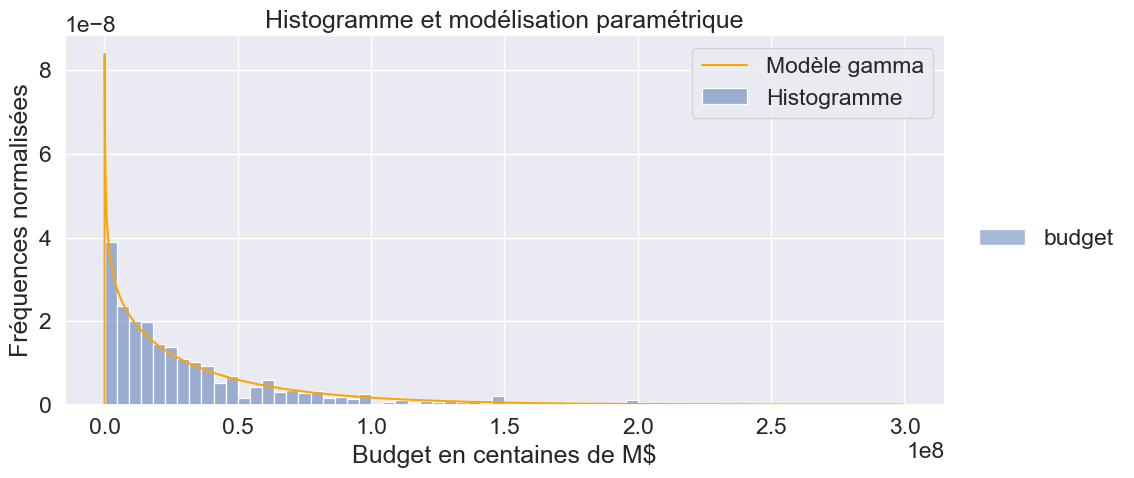

In [21]:
budget = pd.DataFrame(DATA, columns=['budget'])

a = stats.gamma.fit(budget)
print(a)
pdf = stats.gamma.pdf(np.linspace(0, budget.max(), 5000), a[0], a[1], a[2])

plt.figure(figsize=(10,5))
sns.displot(budget, stat = 'density', kde= False, height=5, aspect=2)
plt.plot(np.linspace(0, budget.max(), 5000), pdf, 'orange')
plt.title('Histogramme et modélisation paramétrique')
plt.xlabel('Budget en centaines de M$')
plt.ylabel('Fréquences normalisées')
plt.legend(['Modèle gamma', 'Histogramme'])
plt.show()

<span style="color: #27AE60"> **Exemple :** </span>
Sur la variable score avec une estimation paramétrique (loi gaussienne) et une estimation par noyau. 

6.423733333333334 1.1071740173281093


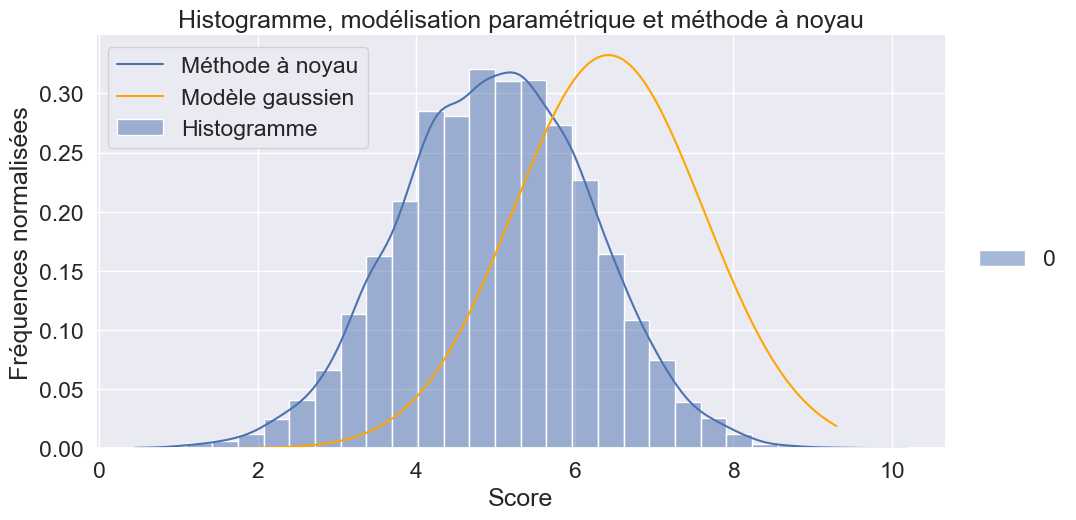

In [22]:
score = pd.DataFrame(DATA, columns=['imdb_score'])

m,sig = stats.norm.fit(score)
print(m, sig)
pdf = stats.norm.pdf(np.linspace(score.min(), score.max(), 500), m, sigma)

sns.displot(X.T, bins=30, stat = 'density', kde= True, height=5, aspect=2);
plt.plot(np.linspace(score.min(), score.max(), 500), pdf, 'orange')
plt.title('Histogramme, modélisation paramétrique et méthode à noyau')
plt.xlabel('Score')
plt.ylabel('Fréquences normalisées')
plt.legend(['Méthode à noyau','Modèle gaussien', 'Histogramme'])# Il faut réécrire par dessus les labels de distplot à cause d'un bug de la fonction
plt.show()

**Observation :** La distribution n'est pas symétrique, l'estimation de la moyenne et de la variance ne permettent pas de localiser correctement la gaussienne. La moyenne ne correspond pas à la localisation du mode principal de l'histogramme.

## 3.3. Courbe des fréquences cumulées

Lorsque la variable étudiée est quantitative, les classes ayant servi à la construction de l'histogramme sont classées dans l'ordre croissant. La courbe de fréquences cumulées est construite en cumulant les fréquences d'une classe à l'autre. Elle donne le nombre ou la proportion d'observations inférieures ou égales à la valeur de la classe considérée.

<span style="color: #27AE60"> **Exemple :** </span> variable gaussienne $X\sim \mathcal{N}(m, \sigma )$ avec $m = 5$ et $\sigma = 1.2$.

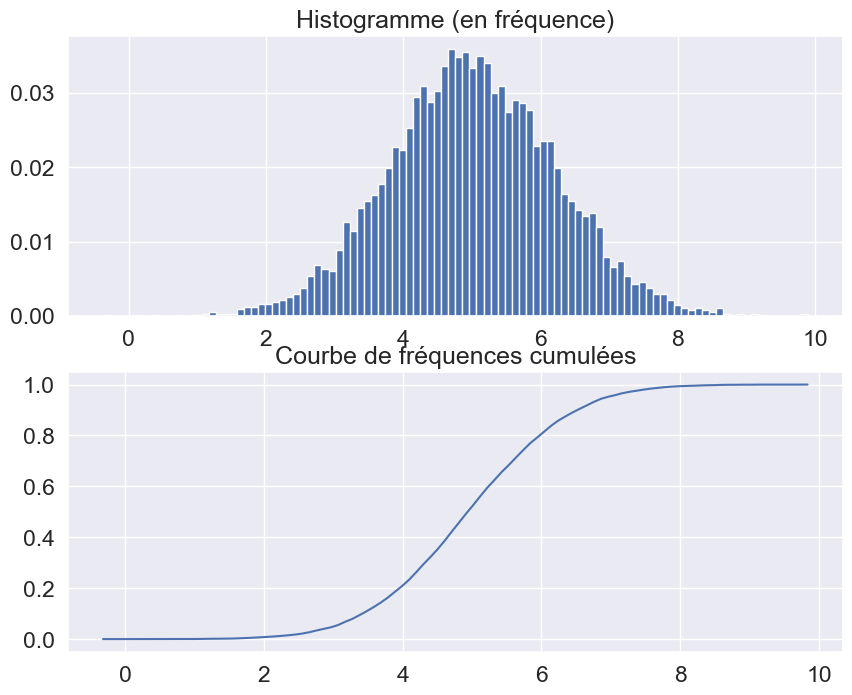

In [23]:
N = 10000
m = 5 # moyenne
sigma = 1.2 # écart-type
X = np.random.normal(m, sigma, (1,N)) # On génère des données qui sont distribuées selon une loi gaussienne

hist, bins = np.histogram(X, bins = int(np.sqrt(N)))
centers = (bins[1:]+bins[:-1])/2

plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
plt.bar(centers, hist/N, width = (bins[1]-bins[0])) # Division par N pour passer en fréquences
plt.title('Histogramme (en fréquence)')
plt.subplot(2,1,2)
plt.plot(centers, np.cumsum(hist/N)) 
plt.title('Courbe de fréquences cumulées')
plt.show()

<span style="color: #27AE60"> **Exemple :** </span>
Sur la variable budget avec une estimation paramétrique (loi gamma).

$\rightarrow$ Utilisation de la fonction $\tt{seaborn.distplot}$. 

(0.7708321194692078, 1099.9999999999998, 45580839.148848325)


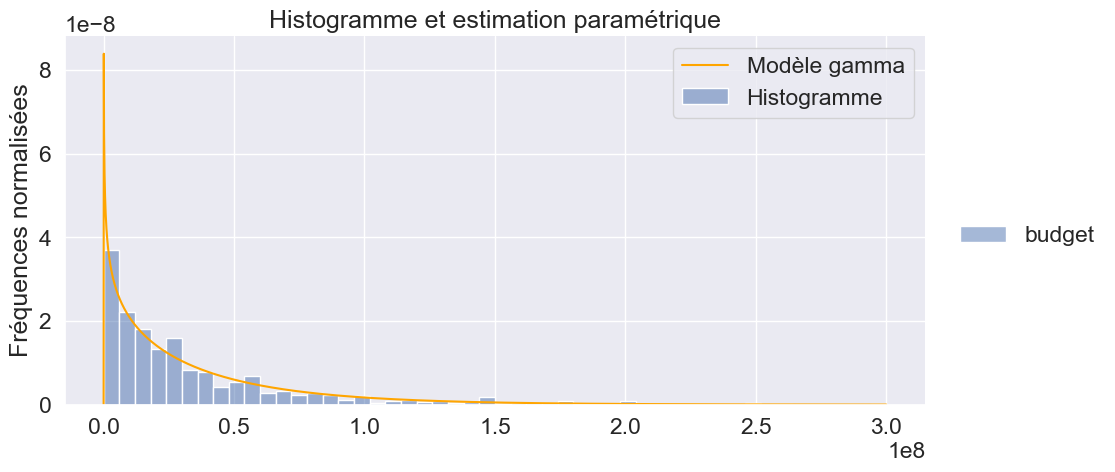

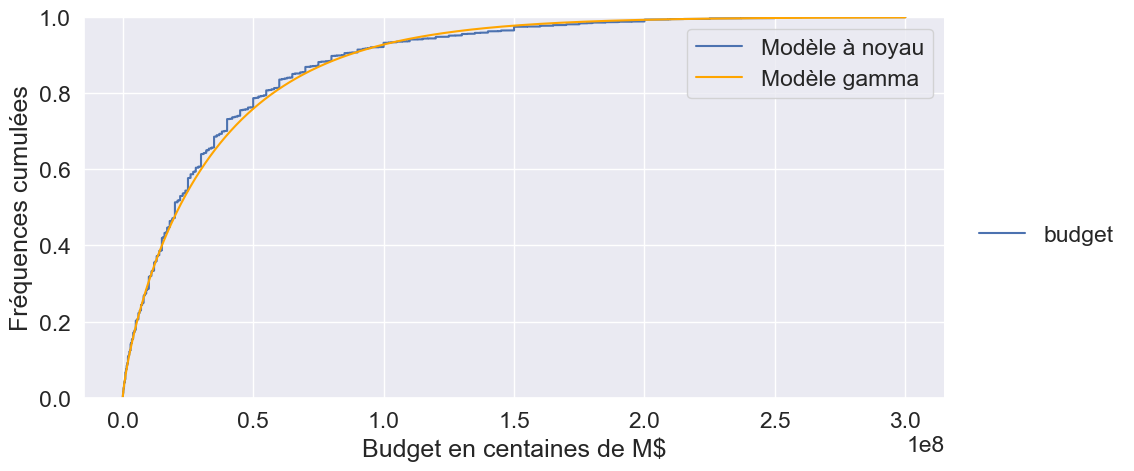

In [24]:
budget = pd.DataFrame(DATA, columns=['budget'])
nbins = 50

abscisses = np.linspace(0, budget.max(), 5000)

a = stats.gamma.fit(budget)
print(a)
pdf = stats.gamma.pdf(abscisses, a[0], a[1], a[2])



# Histogramme et densité de probabilité
sns.displot(budget, bins=nbins, stat = 'density', kde= False, height=5, aspect=2);
plt.plot(abscisses, pdf, 'orange')
plt.title('Histogramme et estimation paramétrique')
plt.ylabel('Fréquences normalisées')
plt.legend(['Modèle gamma', 'Histogramme'])

# Courbe de fréquence cumulée et fonction de répartition
# L'argument 'fit' ne fonctionne pas en mode 'cumulative' il faut donc tracer la fonction de répartion 
# de la loi gamma soi-même (et donc refaire l'ajustement de la loi aux données)


cdf = stats.gamma.cdf(abscisses, a[0],loc = a[1],  scale = a[2])


sns.displot(budget, kind = 'ecdf', height=5, aspect=2)
plt.plot(abscisses, cdf, 'orange') # Affichage de la fonction de répartition estimée
plt.xlabel('Budget en centaines de M$')
plt.ylabel('Fréquences cumulées')
plt.legend(['Modèle à noyau', 'Modèle gamma'])
plt.show()

## 3.4. Diagramme à bâtons

**Construction d'un diagramme à bâtons :**
* Utilisable en analyse unidimensionnelle ou multidimensionnelle (jusqu'à 3 dimensions),
* Analyse unidimensionnelle : pour les variables qualitatives, en abcisse on trouvera les modalités de la variable et en abcisse le nombre d'individus dans chaque modalité.
* Analyse multidimensionnelle : en abscisse et en ordonnée deux variables dont au moins une variable quantitative; possibilité d'ajouter à l'aide d'un code couleur une troisième variable qualitative

**Remarque :**
* En analyse unidimensionnelle, le diagramme à bâtons est l'analogie de l'histogramme pour les variables quantitatives. Les barres ne sont pas ordonnées (on peut les ordonnées si la variable qualitative est ordinale)

<span style="color: #27AE60"> **Exemple :** </span>
Analyse unidimensionnelle sur une variable qualitative (ordinale) sans ordonnancement des modalités.  

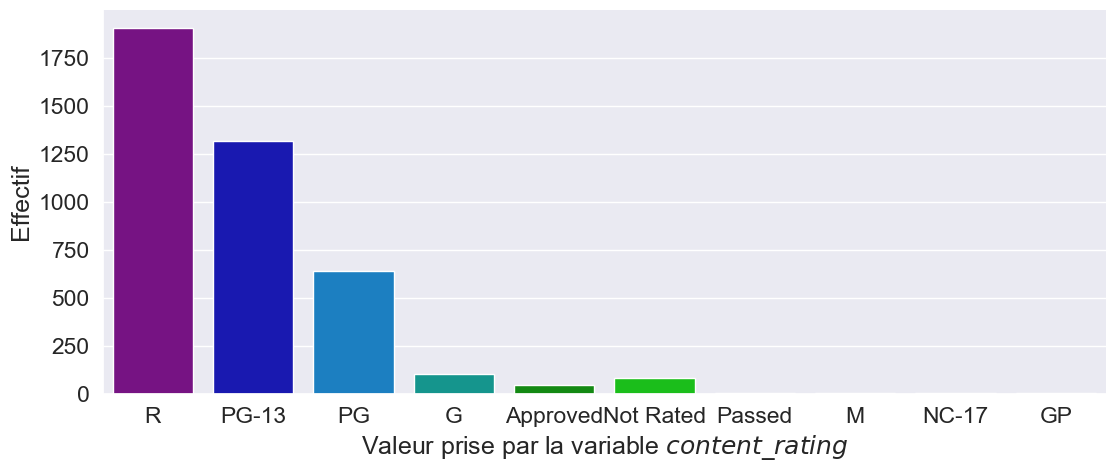

In [25]:
sns.catplot(x="content_rating", kind="count", data= DATA, height = 5, aspect = 2.3,palette = 'nipy_spectral')
plt.xlabel('Valeur prise par la variable $content\_rating$')
plt.ylabel('Effectif')
plt.show()

<span style="color: #27AE60"> **Exemple :** </span>
Analyse multidimensionnelle des variables *score*, *title_year* et *language*. 

In [26]:
df2 = DATA.copy()
df2.language.loc[df2.language != 'English'] = 'Other'
df2


,director_name,num_critic_for_reviews,duration,actor_1_name,actor_2_name,num_voted_users,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,genres,plot_keywords
movie_title,,,,,,,,,,,,,,,,
The Shawshank Redemption,Frank Darabont,199,142,Morgan Freeman,Jeffrey DeMunn,1689764,0,4144,English,USA,R,25000000,1994,9.3,Crime|Drama,escape from prison|first person narration|pris...
The Dark Knight,Christopher Nolan,645,152,Christian Bale,Heath Ledger,1676169,0,4667,English,USA,PG-13,185000000,2008,9.0,Action|Crime|Drama|Thriller,based on comic book|dc comics|psychopath|star ...
Inception,Christopher Nolan,642,148,Leonardo DiCaprio,Tom Hardy,1468200,0,2803,English,USA,PG-13,160000000,2010,8.8,Action|Adventure|Sci-Fi|Thriller,ambiguous ending|corporate espionage|dream|sub...
Fight Club,David Fincher,315,151,Brad Pitt,Meat Loaf,1347461,2,2968,English,USA,R,63000000,1999,8.8,Drama,anti establishment|dark humor|fighting|multipl...
Pulp Fiction,Quentin Tarantino,215,178,Bruce Willis,Eric Stoltz,1324680,1,2195,English,USA,R,8000000,1994,8.9,Crime|Drama,black comedy|cunnilingus|neo noir|nonlinear ti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Call + Response,Justin Dillon,7,86,Matisyahu,Natasha Bedingfield,48,3,2,English,USA,PG-13,200000,2008,7.5,Documentary|History|Music,fair trade|human trafficking|non profit|rockum...
Living Dark: The Story of Ted the Caver,David Hunt,1,112,Matthew Alan,Chris Cleveland,28,0,1,English,USA,PG-13,1750000,2013,6.3,Horror,brother|cave|caver|dark|funeral
Horse Camp,Joel Paul Reisig,1,108,Joshua Ray Bell,Dana Blackstone,25,6,1,English,USA,PG,250000,2014,6.6,Family,NaN


Représentation multidimensionnelle sur les variables score, année de production et langue à l'aide de boîtes à moustaches. 

$\rightarrow$ Utilisation de la fonction $\tt{seaborn.barplot}$. 

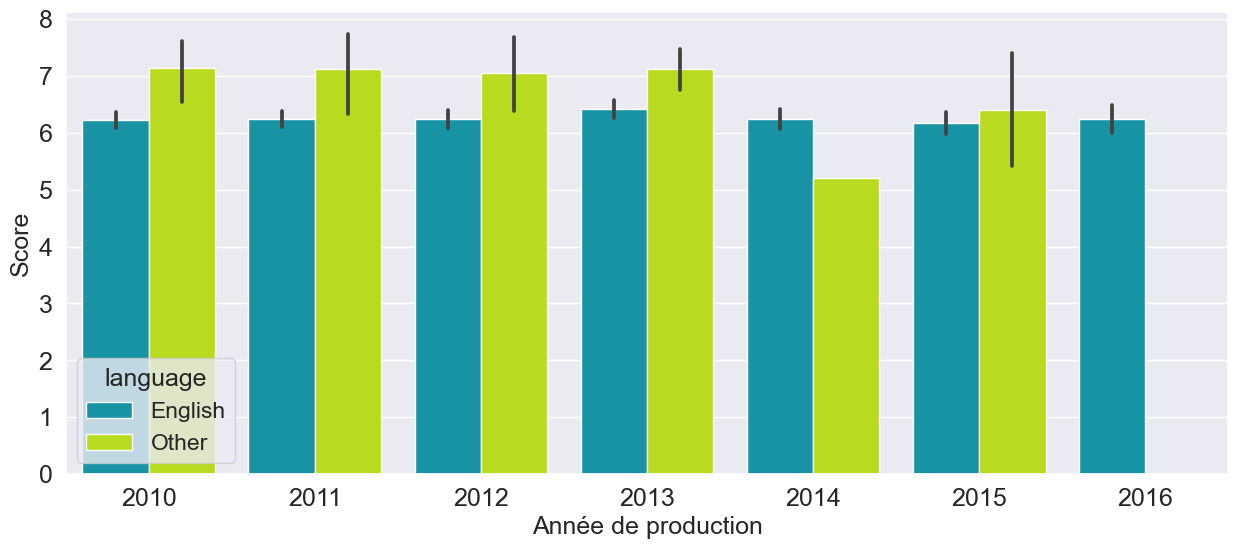

In [27]:
years = np.arange(2010, 2017)
df3 = df2[df2.title_year.isin(years)]
plt.figure(figsize = (15,6))
sns.barplot(x="title_year", y="imdb_score", hue="language", data= df3,palette = 'nipy_spectral');  
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Année de production', fontsize = 18)
plt.ylabel('Score', fontsize = 18)
plt.show()

**Observations :** 
* Chaque bâton représente le score moyen d'une sous-population, ici une sous-population est composée des films tournés en anglais ou dans une autre langue pour une année donnée. 
* Le trait noir représente l'écart-type des scores pour chaque sous-population. 
* Ce type de diagramme ne donne pas d'information sur les effectifs de chaque sous-population. 
* Comment expliquer qu'il n'y a pas d'écart-type indiqué pour les films tournés dans une autre langue que l'anglais en 2014 ? 
    -> La base de donnée à été enregistrée courant 2016 et donc on peut supposer qu'il n'y avait pas encore de film dans une autre langue enregistré dans la bdd.

## 3.5. Boites à moustaches

La boîte à moustaches ou diagramme en boîte (boxplot) est une représentation graphique de l'information portée par les quartiles sur la répartition des données. Un exemple unidimensionnel (une seule variable) est donné sur la figure ci-dessous. 

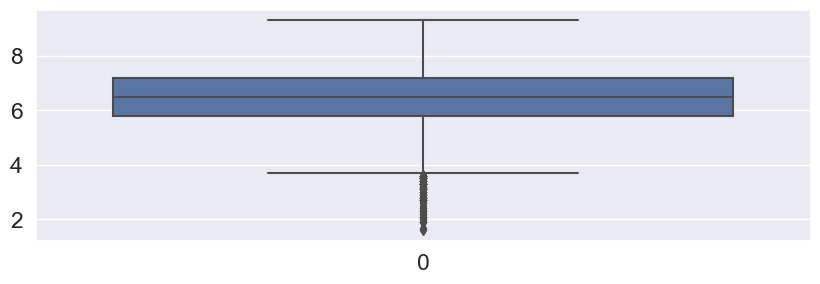

In [30]:
plt.figure(figsize = (10,3))
sns.boxplot(DATA.imdb_score)
plt.show()


**Construction**

On la construit en traçant horizontalement un rectangle allant de $Q_1$ à $Q_3$ coupé par $Q_2$. Les segments ajoutés aux extrémités peuvent être prolongés de différentes manières : 
 * jusqu'aux valeurs extrêmes du jeu de données, 
 * pour représenter un intervalle de confiance à $\pm 5\%$ par exemple,
 * de manière à ce que les deux segments (moustaches) mesurent chacun 1.5 fois l'écart interquantile $Q_3 - Q_1$ (on appelle alors cette représentation un diagramme en boîte de Tukey).
    * /!\ Attention, cette représentation est sensible aux valeurs extrêmes. (voir la documentation de la fonction `seaborn.boxplot` pour plus d'informations)

<span style="color: #27AE60"> **Exemple :** </span>
Représentation multidimensionnelle sur les variables score, année de production et langue à l'aide de boîtes à moustaches. 

$\rightarrow$ Utilisation de la fonction $\tt{seaborn.boxplot}$ en précisant les variables à placer en ordonnées et en abscisses ainsi que la variable qualitative pour le code couleur. 

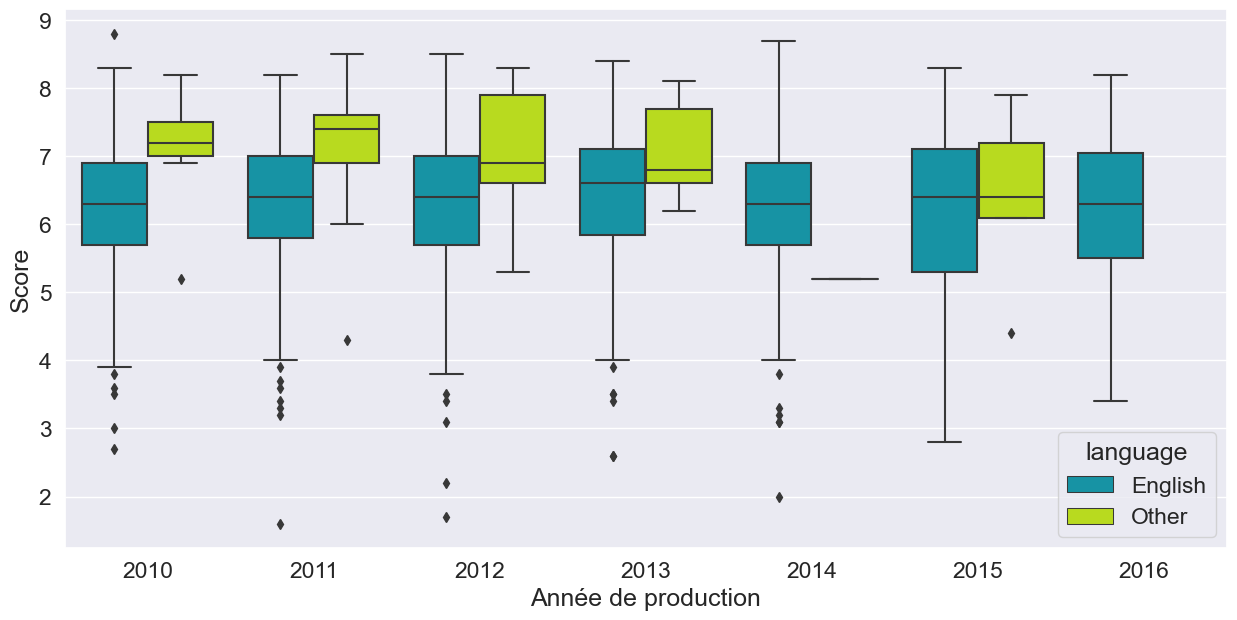

In [31]:
plt.figure(figsize = (15,7))
sns.boxplot(x="title_year", y="imdb_score", hue="language", data= df3,palette = 'nipy_spectral')
plt.xlabel('Année de production')
plt.ylabel('Score')
plt.show()

**Observations :**
* La fonction $\tt{seaborn.boxplot }$ utilise la représentation de Tukey, les moustaches ont donc une longueur de $1.5*(Q_3 - Q_1)$, sauf si la valeur minimale est plus élevée que $Q_2 - 1.5*(Q_3 - Q_1)$ ou que la valeur maximale est plus faible que $Q_2 + 1.5*(Q_3 - Q_1)$ dans ce cas les moustaches sont limitées à la valeur minimale ou maximale. 
* Les points à l'extérieur des moustaches correspondent aux valeurs extremes qui sont inférieures à $Q_2 - 1.5*(Q_3 - Q_1)$ ou supérieures à $Q_2 + 1.5*(Q_3 - Q_1)$, et sont donc considérés comme points aberrants. 
* Petite subtilité dans l'affichage des boîtes à moustaches avec `sns.boxplot` en présence d'*outlier* (point aberrant) la moustache s'arrête au dernier point rencontré qui n'est pas considérer comme *outlier*, ce qui explique que pour certaines boites à moustaches, même en présence d''outlier, la moustache ne mesure pas strictement $1.5*(Q_3 - Q_1)$. 

## Conclusion sur les différentes représentations graphiques

 * Tous les outils ne délivrent pas la même quantité d'information. 
 * L'histogramme/densité de proba est l'outil le plus complet en analyse unidimensionnelle de variables quantitatives $\rightarrow$ construction de la boîte à moustache possible, calcul des quantiles, etc. 
 * Avantage des diagramme à bâtons et boîte à moustaches : permettent la représentation graphique multidimensionnelle et le travail avec des variables qualitatives. D'autres méthodes de représentations graphiques sont disponibles dans le package [seaborn](https://seaborn.pydata.org/tutorial/categorical.html)
 * Les nuages de points permettent la représentation des données brutes, mais ne résument pas les informations portées par les données.
 * On verra dans les chapitres suivants quelques représentations graphiques supplémentaires permettant de visualiser des informations construites/extraites à partir du jeu de données.  

# Ressources complémentaires : 

**Documentation python pour les représentations graphiques :**
* [seaborn](https://seaborn.pydata.org/tutorial.html)
* [matplotlib](https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py)

**Supports de cours :**
https://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-tutor2-python-pandas.pdf